<a href="https://colab.research.google.com/github/mezad2003-cmd/Vision-artificial/blob/main/Tare1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra with Numpy

Andrés Marrugo, PhD    
Universidad Tecnológica de Bolívar

Based on the jupyter notebook by [Vince Knight](https://github.com/drvinceknight/Python-Mathematics-Handbook)

Many computer vision algorithms require numeric computations performed with matrices and these are best solved with [Numpy](http://www.numpy.org/) a high performance numerical computing library.

Here is how it is described:

> NumPy is the fundamental package for scientific computing with Python. It contains among other things: [...]
 useful linear algebra, Fourier transform, and random number capabilities.

This notebook is a way to review several linear algebra concepts and to get acquainted with their computation in Python. In this section we will see how to:

- Manipulate matrices;
- Solve Matrix equations;
- Calculate Matrix inverse and determinants.

## Manipulating matrices

It is straightforward to create a Matrix using Numpy. Let us consider the following as a examples:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$


First, we need to import Numpy:

In [2]:
import numpy as np

Now we can define $A$:

In [3]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [4]:
A

array([[ 5,  6,  2],
       [ 4,  7, 19],
       [ 0,  3, 12]])

In [5]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

In [6]:
B

array([[14, -2, 12],
       [ 4,  4,  5],
       [ 5,  5,  1]])

We can obtain the following straightforwardly:

- $5A$ (or any other scalar multiple of $A$);
- $A ^ 3$ (or any other exponent of $A$);
- $A + B$;
- $A - B$;
- $AB$

In [7]:
5 * A

array([[25, 30, 10],
       [20, 35, 95],
       [ 0, 15, 60]])

In [8]:
A ** 3

array([[ 125,  216,    8],
       [  64,  343, 6859],
       [   0,   27, 1728]])

In [9]:
A + B

array([[19,  4, 14],
       [ 8, 11, 24],
       [ 5,  8, 13]])

In [10]:
A - B

array([[ -9,   8, -10],
       [  0,   3,  14],
       [ -5,  -2,  11]])

In [11]:
A @ B

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

**Matrix multiplication.** Unfortunately, there are many ways to do [matrix multiplication in Python](https://blog.finxter.com/numpy-matmul-operator/ "NumPy Matrix Multiplication — np.matmul() and @ [Ultimate Guide] | Finxter"). The suggested way is to used the `@` operator because the `*` does not perform matrix multiplication.

Check that `np.dot(A, B)` produces the same result.

In [12]:
np.dot(A, B)

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

---

**EXERCISE** Compute $A ^ 2 - 2 A + 3$ with:

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

---

In [13]:
# Write here the solution
A= np.array([[1, -1],
               [2, 1]])
r1= (A @ A) - (2 * A) + 3
print("Resultado de A² - 2A + 3:")
print(r1)


Resultado de A² - 2A + 3:
[[0 3]
 [3 0]]


## Solving Matrix equations

We can use Numpy to (efficiently) solve large systems of equations of the form:

$$Ax=b$$

Let us illustrate that with:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$

In [14]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
b = np.array([[-1], [2], [1]])

We use the `linalg.solve` command:

In [15]:
x = np.linalg.solve(A, b)
x

array([[ 0.45736434],
       [-0.62790698],
       [ 0.24031008]])

We can verify our result:

In [16]:
A @ x

array([[-1.],
       [ 2.],
       [ 1.]])

---

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

---

In [17]:
# Write the solution here
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])
b= np.array([[-1], [2], [1]])
x = np.linalg.solve(B, b)
print("Solución Bx = b:")
print("x =", x)
print()
print("Comprobación:")
B @ x

Solución Bx = b:
x = [[-0.25892857]
 [ 0.40178571]
 [ 0.28571429]]

Comprobación:


array([[-1.],
       [ 2.],
       [ 1.]])

## Matrix inversion and determinants

Computing the inverse of a matrix is straightforward:

In [18]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
Ainv = np.linalg.inv(A)
Ainv

array([[-0.20930233,  0.51162791, -0.7751938 ],
       [ 0.37209302, -0.46511628,  0.6744186 ],
       [-0.09302326,  0.11627907, -0.08527132]])

We can verify that $A^{-1}A=\mathbb{1}$:

In [19]:
A @ Ainv

array([[ 1.00000000e+00,  4.99600361e-16, -4.71844785e-16],
       [ 1.38777878e-16,  1.00000000e+00, -2.63677968e-16],
       [ 1.11022302e-16,  1.11022302e-16,  1.00000000e+00]])

The above might not look like the identity matrix but if you look closer you see that the diagonals are all `1` and the off diagonals are a **very** small number (which from a computer's point of view is `0`).

We can also verify that `A @ Ainv` is close to the identity matrix `np.eye()` using the `np.allclose()` command.

In [20]:
# Run this command to check that A @ Ainv is close to I
np.allclose(A @ Ainv, np.eye(3,3))

True

To calculate the determinant:

In [21]:
np.linalg.det(A)

np.float64(-129.00000000000009)

---

**EXERCISE** Compute the inverse and determinant of $B$ (defined previously).

---

In [22]:
# Write the solution here
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])
Binv = np.linalg.inv(B)
Bdet= np.linalg.det(B)
print("Inversa de B:")
print(Binv)
print()
print("Determinante de B:")
print(Bdet)
print()
#comprobar inversa
print("Comprobación inversa:")
print(B @ Binv)
np.allclose(B @ Binv, np.eye(3,3))

Inversa de B:
[[ 6.25000000e-02 -1.84523810e-01  1.72619048e-01]
 [-6.25000000e-02  1.36904762e-01  6.54761905e-02]
 [-1.09511795e-17  2.38095238e-01 -1.90476190e-01]]

Determinante de B:
-336.0

Comprobación inversa:
[[ 1.00000000e+00  0.00000000e+00  1.11022302e-16]
 [ 7.55253758e-19  1.00000000e+00  8.32667268e-17]
 [ 4.45599717e-17 -3.33066907e-16  1.00000000e+00]]


True

## Rotations

Rotation is a fundamental operation in computer graphics, robotics, and many other fields. In this exercise, you will create a 2D rotation matrix and apply it to a set of points.



Generate a set of points in 2D forming a square. You can do this manually or use the `np.mgrid` function.

In [23]:
points = np.array([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])

Create a function that returns a 2D rotation matrix given an angle in degrees. The rotation matrix for a counterclockwise rotation by an angle $\theta$ in 2D is:

\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\\\
\sin(\theta) & \cos(\theta)
\end{bmatrix}


In [24]:
# Here is the function
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


Apply the rotation matrix to the set of points for a few different angles (e.g., 45, 90, 180 degrees) and plot the original points and the transformed points using `plt.plot()`. You should see the square rotate.

Dont'forget to import matplotlib for plotting.

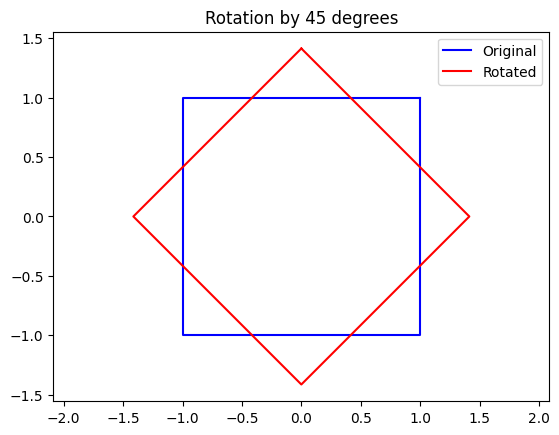

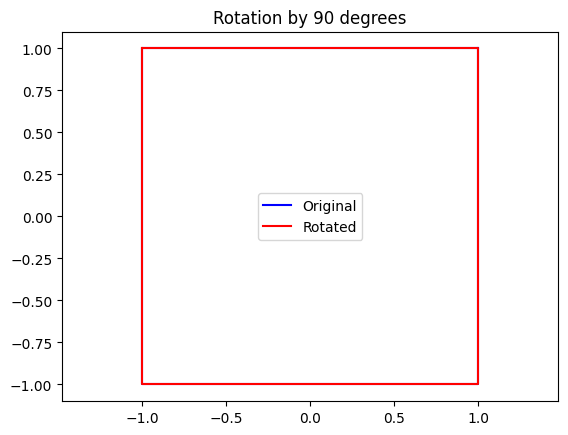

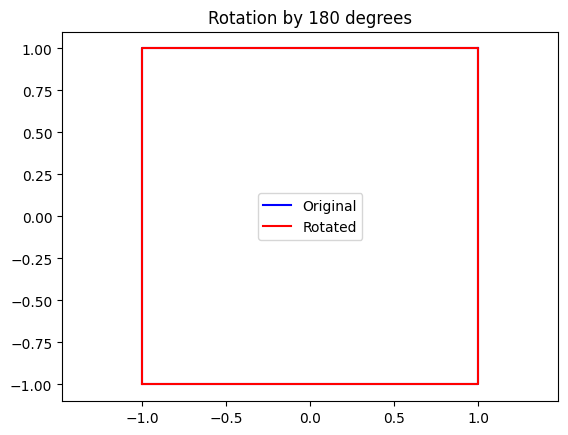

In [25]:
import matplotlib.pyplot as plt

for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_points = R @ points
    plt.figure()
    plt.plot(points[0, :], points[1, :], 'b-', label='Original')
    plt.plot(rotated_points[0, :], rotated_points[1, :], 'r-', label='Rotated')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.show()


---

**EXERCISE** Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.

---

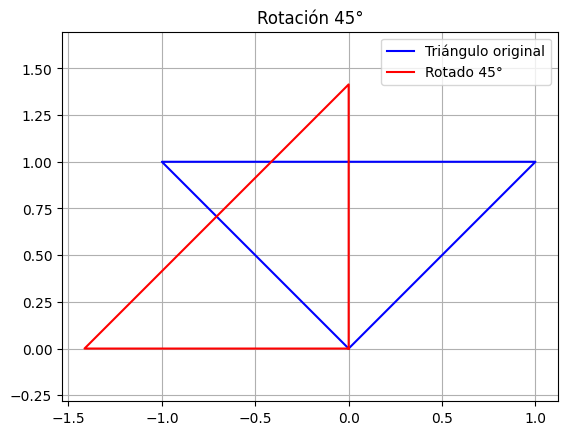

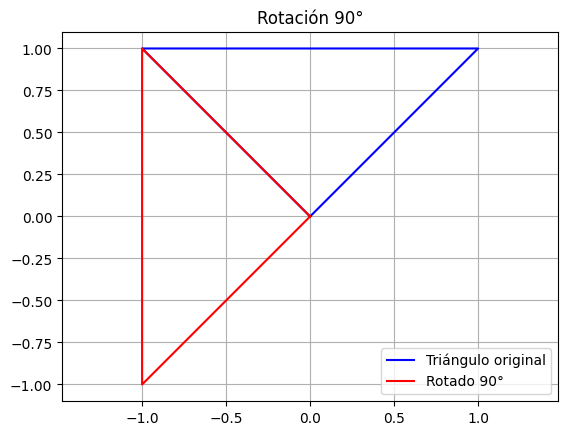

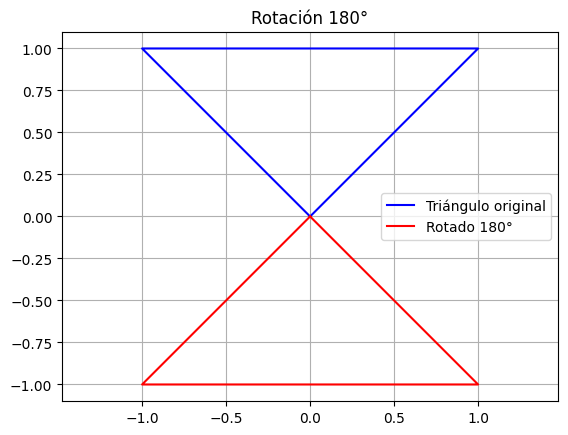

In [26]:
# Write the solution here
# Puntos de un triángulo (base en x, punta arriba)
triangulo = np.array([[0, -1, 1, 0],     # X
                     [0,  1, 1,0]])    # Y

import matplotlib.pyplot as plt
for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_t = R @ triangulo
    plt.figure()
    plt.plot(triangulo[0,:], triangulo[1,:], 'b-', label='Triángulo original')
    plt.plot(rotated_t[0,:], rotated_t[1,:], 'r-', label=f'Rotado {theta}°')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotación {theta}°')
    plt.grid(True)
    plt.show()


## Exercise for Graduate students: Image Compression and Reconstruction using SVD

Use Singular Value Decomposition (SVD) to compress and reconstruct an image, exploring the trade-offs between compression ratio and image quality. This exercise will highlight the utility of SVD in practical image processing tasks.

### Steps

#### 1. Image Preparation
- Load a grayscale image into a Numpy array.
- Display the original image.

#### 2. Applying SVD
- Perform SVD on the image matrix to obtain U, Σ, and V^T.
- Display the shapes of U, Σ, and V^T.

#### 3. Image Compression
- Choose a set of singular values (e.g., first 10, 20).
- Reconstruct the image using only the chosen singular values.
- Repeat with different numbers of singular values to explore different compression levels.

#### 4. Visualization and Analysis
- Display original and compressed images side by side.
- Discuss the compression ratio and impact on image quality for each compression level.

#### 5. Advanced Exploration (Optional)
- Test the compression on different image types.
- Explore SVD in noise reduction by altering singular values before reconstruction.

### Requirements
- Use Numpy for SVD and matrix operations.
- Use matplotlib or similar for image handling.
- Provide explanations for each step, emphasizing the principles and applications of SVD.

Saving rr.jpeg to rr (4).jpeg
Usando imagen: rr (4).jpeg
Forma original: (1600, 900)

Formas SVD:
U: (1600, 900)
s: 900
Primeros 5 valores singulares: [131749.28708147  33908.6655857   17344.2871216   14514.7593795
  14386.95187045]


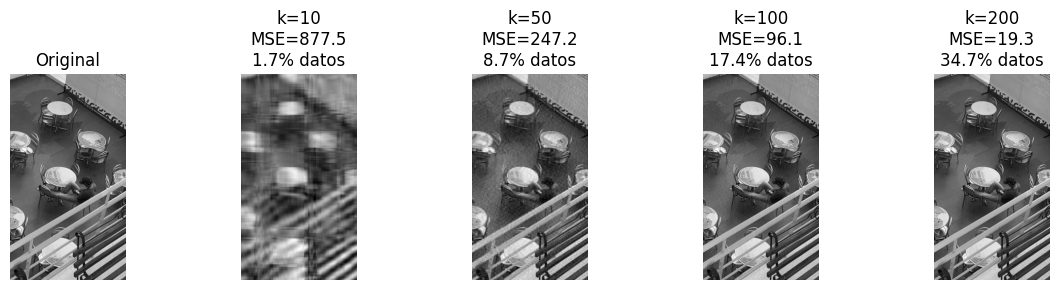

In [34]:
# Write the solution here
# Write the solution here
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

from google.colab import files
uploaded = files.upload()


rr = list(uploaded.keys())[0]  # Primer archivo subido
print(f"Usando imagen: {rr}")

# Cargar  imagen
img = imageio.imread(rr)
if img.ndim == 3:  # Si es RGB → grayscale
    img_array = np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)
else:
    img_array = img

print("Forma original:", img_array.shape)

# Mostrar original
plt.figure(figsize=(12, 3))
plt.subplot(1, 5, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original')
plt.axis('off')

# 2. SVD
U, s, Vt = np.linalg.svd(img_array.astype(float), full_matrices=False)
print("\nFormas SVD:")
print("U:", U.shape)
print("s:", len(s))
print("Primeros 5 valores singulares:", s[:5])

# 3. Compresión
k_values = [10, 50, 100, 200]
total_pixels = img_array.size

for i, k in enumerate(k_values):
    # Σ diagonal correcto
    S_k = np.zeros((U.shape[1], Vt.shape[0]))
    np.fill_diagonal(S_k, s[:k])
    img_recon = U[:, :k] @ S_k[:k, :k] @ Vt[:k, :]

    mse = np.mean((img_array - img_recon)**2)
    comp_ratio = (k * (img_array.shape[0] + img_array.shape[1])) / total_pixels * 100

    plt.subplot(1, len(k_values)+1, i+2)
    plt.imshow(img_recon.clip(0,255).astype(np.uint8), cmap='gray')
    plt.title(f'k={k}\nMSE={mse:.1f}\n{comp_ratio:.1f}% datos')
    plt.axis('off')

plt.tight_layout()
plt.show()




## Summary

In this section we have seen how to using Numpy:

- Manipulate matrices;
- Solve linear systems;
- Compute Matrix inverses and determinants.

This again just touches on the capabilities of Numpy. For more information please refer to this [Python tutorial.](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb)